# Pandas

#### Dictionary to DataFrame 
Pandas is an open source library, providing high-performance, easy-to-use data structures and data analysis tools for Python. Sounds promising!

The DataFrame is one of Pandas' most important data structures. It's basically a way to store tabular data where you can label the rows and the columns. One way to build a DataFrame is from a dictionary.

In the exercises that follow you will be working with vehicle data from different countries. Each observation corresponds to a country and the columns give information about the number of vehicles per capita, whether people drive left or right, and so on.

In [1]:
# Import pandas as pd
import pandas as pd

# Lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict = {'country':names, 'drives_right':dr, 'cars_per_cap':cpc}

# Build a DataFrame cars from my_dict: cars
cars = pd.DataFrame(my_dict)

# Print cars
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


The Python code that solves the previous exercise is included in the script. Have you noticed that the row labels (i.e. the labels for the different observations) were automatically set to integers from 0 up to 6?

To solve this a list row_labels has been created. You can use it to specify the row labels of the cars DataFrame. You do this by setting the index attribute of cars, that you can access as cars.index.

In [2]:
# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)

# Definition of row_labels
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JAP          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


#### CSV to DataFrame 
Putting data in a dictionary and then building a DataFrame works, but it's not very efficient. What if you're dealing with millions of observations? In those cases, the data is typically available as files with a regular structure. One of those file types is the CSV file, which is short for "comma-separated values".

To import CSV data into Python as a Pandas DataFrame you can use read_csv().

Let's explore this function with the same cars data from the previous exercises. This time, however, the data is available in a CSV file, named cars.csv. It is available in your current working directory, so the path to the file is simply 'cars.csv'.

In [3]:
# Import the cars.csv data: cars
cars = pd.read_csv('../data/cars.csv')

# Print out cars
print(cars)

  Unnamed: 0  cars_per_cap        country  drives_right
0         US           809  United States          True
1        AUS           731      Australia         False
2        JAP           588          Japan         False
3         IN            18          India         False
4         RU           200         Russia          True
5        MOR            70        Morocco          True
6         EG            45          Egypt          True


Your read_csv() call to import the CSV data didn't generate an error, but the output is not entirely what we wanted. The row labels were imported as another column without a name.
Remember index_col, an argument of read_csv(), that you can use to specify which column in the CSV file should be used as a row label? Well, that's exactly what you need here!

In [4]:
# Fix import by including index_col
cars = pd.read_csv('../data/cars.csv', index_col=0)

# Print out cars
print(cars)

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
RU            200         Russia          True
MOR            70        Morocco          True
EG             45          Egypt          True


#### Square Brackets 
You can index and select Pandas DataFrames in many different ways. The simplest, but not the most powerful way, is to use square brackets. Square brackets can do more than just selecting columns. You can also use them to get rows, or observations, from a DataFrame. 

In [5]:
# Print out country column as Pandas Series
print(f"Pandas Series\n--------------------\n{cars['country']}\n")

# Print out country column as Pandas DataFrame
print(f"Pandas DataFrame\n------------------\n{cars[['country']]}")


Pandas Series
--------------------
US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object

Pandas DataFrame
------------------
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt


In [6]:
# Print out first 3 observations
print(cars[0:3])

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False


In [7]:
# Print out fourth, fifth and sixth observation
print(cars[3:6])

     cars_per_cap  country  drives_right
IN             18    India         False
RU            200   Russia          True
MOR            70  Morocco          True


In [8]:
# Create car_maniac: observations that have a cars_per_cap over 500
car_maniac = cars[cars['cars_per_cap'] > 500]
print(car_maniac)

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False


#### loc and iloc 
With loc and iloc you can do practically any data selection operation on DataFrames you can think of. loc is label-based, which means that you have to specify rows and columns based on their row and column labels. iloc is integer index based, so you have to specify rows and columns by their integer index like you did in the previous exercise.

In [9]:
# Print out drives_right value of Morocco
print(cars.loc['MOR', 'drives_right'])

True


In [10]:
# Print sub-DataFrame
print(cars.loc[['RU', 'MOR'], ['country', 'drives_right']])

     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [11]:
# Print out drives_right column as Series
print(cars.loc[:, 'drives_right'])

US      True
AUS    False
JAP    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool


In [12]:
# Print out drives_right column as DataFrame
print(cars.loc[:, ['drives_right']])

     drives_right
US           True
AUS         False
JAP         False
IN          False
RU           True
MOR          True
EG           True


In [13]:
# Print out cars_per_cap and drives_right as DataFrame
print(cars.loc[:, ['cars_per_cap', 'drives_right']])

     cars_per_cap  drives_right
US            809          True
AUS           731         False
JAP           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


# Matplotlib


#### Line Plot 
With matplotlib, you can create a bunch of different plots in Python. The most basic plot is the line plot. *When you have a time scale along the horizontal axis, the line plot is your friend*.

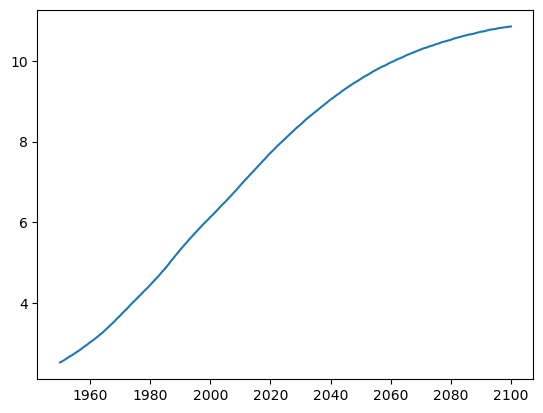

In [14]:
import matplotlib.pyplot as plt

years = pd.read_csv('../data/years.csv', header=None).values.flatten()
population = pd.read_csv('../data/population.csv', header=None).values.flatten()

# Make a line plot: year on the x-axis, pop on the y-axis
plt.plot(years, population)

# Display the plot with plt.show()
plt.show()

> The line plot above shows that approximately in the year 2060 will there be more than ten billion human beings on this planet.

#### Scatter Plot 
When you're trying to assess if there's a correlation between two variables, for example, the *scatter plot is the better choice*.

Let's continue with the gdp_cap versus life_exp plot, the GDP and life expectancy data for different countries in 2007.

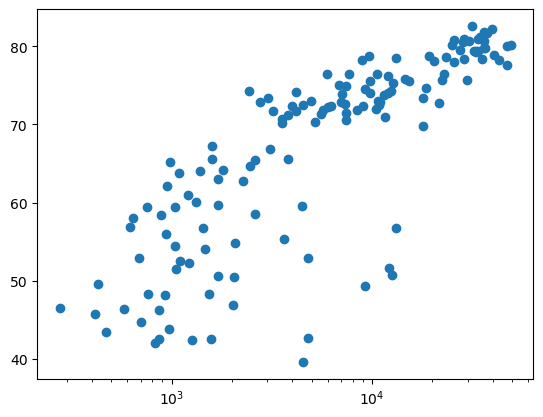

array([  974.5803384,  5937.029526 ,  6223.367465 ,  4797.231267 ,
       12779.37964  , 34435.36744  , 36126.4927   , 29796.04834  ,
        1391.253792 , 33692.60508  ,  1441.284873 ,  3822.137084 ,
        7446.298803 , 12569.85177  ,  9065.800825 , 10680.79282  ,
        1217.032994 ,   430.0706916,  1713.778686 ,  2042.09524  ,
       36319.23501  ,   706.016537 ,  1704.063724 , 13171.63885  ,
        4959.114854 ,  7006.580419 ,   986.1478792,   277.5518587,
        3632.557798 ,  9645.06142  ,  1544.750112 , 14619.22272  ,
        8948.102923 , 22833.30851  , 35278.41874  ,  2082.481567 ,
        6025.374752 ,  6873.262326 ,  5581.180998 ,  5728.353514 ,
       12154.08975  ,   641.3695236,   690.8055759, 33207.0844   ,
       30470.0167   , 13206.48452  ,   752.7497265, 32170.37442  ,
        1327.60891  , 27538.41188  ,  5186.050003 ,   942.6542111,
         579.231743 ,  1201.637154 ,  3548.330846 , 39724.97867  ,
       18008.94444  , 36180.78919  ,  2452.210407 ,  3540.6515

In [15]:
# Convert gapminder.csv to DataFrame
df_gapminder = pd.read_csv('../data/gapminder.csv')

gdp_cap = df_gapminder['gdp_cap'].values
life_exp = df_gapminder['life_exp'].values

# Make a scatter plot
plt.scatter(gdp_cap, life_exp)

# Put the x-axis on a logarithmic scale
plt.xscale('log')

# Show plot
plt.show()
gdp_cap

### Histogram 
life_exp, the list containing data on the life expectancy for different countries in 2007. To see how life expectancy in different countries is distributed, let's create a histogram of life_exp.

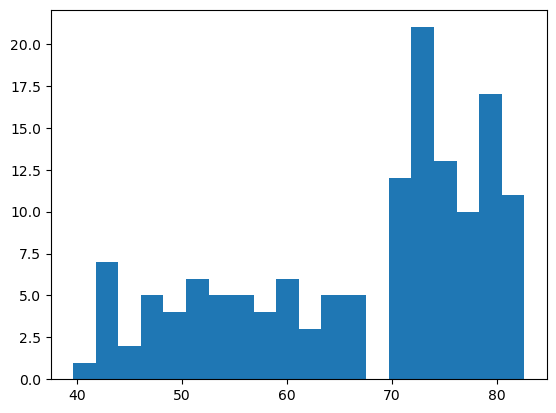

In [16]:
# Build histogram with 20 bins
plt.hist(life_exp, bins=20)
plt.show()

#### Labels and Ticks 
It's time to customize your own plot. This is the fun part, you will see your plot come to life!

You're going to work on the scatter plot with world development data: GDP per capita on the x-axis (logarithmic scale), life expectancy on the y-axis. The code for this plot is available in the script.

As a first step, let's add axis labels, title, and ticks to the plot. You can do this with the xlabel(), ylabel(), title(), xticks(), and yticks() functions, available in matplotlib.pyplot.

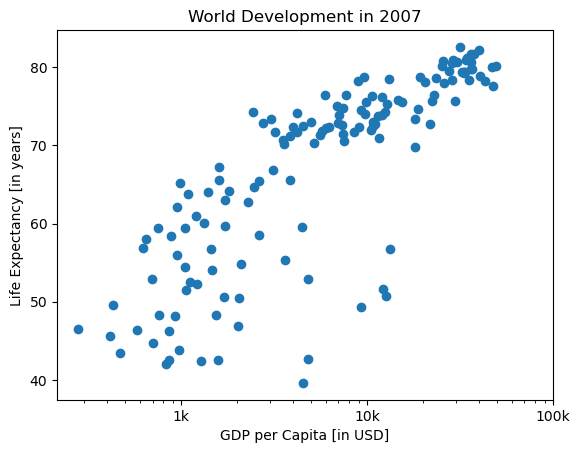

In [17]:
# Basic scatter plot, log scale
plt.scatter(gdp_cap, life_exp)
plt.xscale('log') 

# Add axis labels
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')

# Add title
plt.title('World Development in 2007')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

# After customizing, display the plot
plt.show()

#### <span style="color:yellow">Colors and Size</span>
Right now, the scatter plot is just a cloud of blue dots, indistinguishable from each other. Let's change this. Wouldn't it be nice if the size of the dots corresponds to the population?

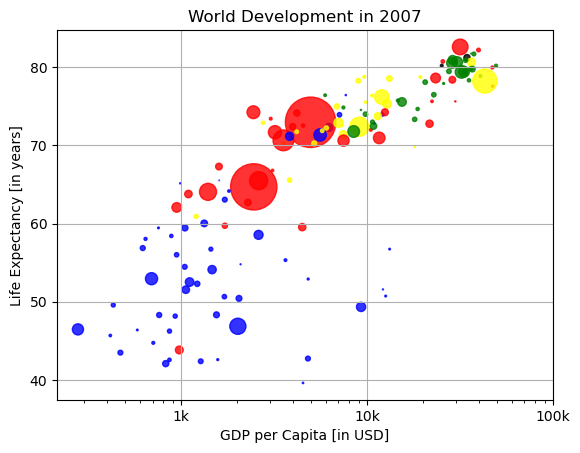

In [18]:
import numpy as np

colors_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}

# Create new column color and map the continent by color
df_gapminder['colors'] = df_gapminder['cont'].map(colors_dict)

# Specify c, s and alpha inside plt.scatter()
plt.scatter(x = gdp_cap, y = life_exp, alpha=0.8, c=df_gapminder.colors, s=df_gapminder['population'] / 1e6)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Add grid
plt.grid(True)

# Show the plot
plt.show()


# For Loops
#### Index and values 

Using a for loop to iterate over a list only gives you access to every list element in each run, one after the other. If you also want to access the index information, so where the list element you're iterating over is located, you can use enumerate().

In [19]:
# areas list
areas = [11.25, 18.0, 20.0, 10.75, 9.50]

# Change for loop to use enumerate() and update print()
for index,value in enumerate(areas) :
    print(f'room {index}: {value}')

room 0: 11.25
room 1: 18.0
room 2: 20.0
room 3: 10.75
room 4: 9.5


#### Loop over list of lists
Remember the house variable from the Intro to Python course? Have a look at its definition in the script. It's basically a list of lists, where each sublist contains the name and area of a room in your house.

In [20]:
# house list of lists
house = [["hallway", 11.25], 
         ["kitchen", 18.0], 
         ["living room", 20.0], 
         ["bedroom", 10.75], 
         ["bathroom", 9.50]]
         
# Build a for loop from scratch
for h in house:
    print(f'the {h[0]} is {h[1]} sqm')

the hallway is 11.25 sqm
the kitchen is 18.0 sqm
the living room is 20.0 sqm
the bedroom is 10.75 sqm
the bathroom is 9.5 sqm


#### Loop over dictionary
In Python 3, you need the items() method to loop over a dictionary:

In [21]:
# Definition of dictionary
europe = {'spain':'madrid', 
          'france':'paris', 
          'germany':'berlin',
          'norway':'oslo', 
          'italy':'rome', 
          'poland':'warsaw', 
          'austria':'vienna' }
          
# Iterate over europe
for key, val in europe.items():
    print(f'the capital of {key} is {val}')

the capital of spain is madrid
the capital of france is paris
the capital of germany is berlin
the capital of norway is oslo
the capital of italy is rome
the capital of poland is warsaw
the capital of austria is vienna


#### Loop over NumPy array
If you're dealing with a 1D NumPy array, looping over all elements can be as simple as:

In [22]:
height = pd.read_csv('../data/height.csv', header=None).values.flatten()
for i in height:
    print(i)


74
74
72
72
73
69
69
71
76
71
73
73
74
74
69
70
73
75
78
79
76
74
76
72
71
75
77
74
73
74
78
73
75
73
75
75
74
69
71
74
73
73
76
74
74
70
72
77
74
70
73
75
76
76
78
74
74
76
77
81
78
75
77
75
76
74
72
72
75
73
73
73
70
70
70
76
68
71
72
75
75
75
75
68
74
78
71
73
76
74
74
79
75
73
76
74
74
73
72
74
73
74
72
73
69
72
73
75
75
73
72
72
76
74
72
77
74
77
75
76
80
74
74
75
78
73
73
74
75
76
71
73
74
76
76
74
73
74
70
72
73
73
73
73
71
74
74
72
74
71
74
73
75
75
79
73
75
76
74
76
78
74
76
72
74
76
74
75
78
75
72
74
72
74
70
71
70
75
71
71
73
72
71
73
72
75
74
74
75
73
77
73
76
75
74
76
75
73
71
76
75
72
71
77
73
74
71
72
74
75
73
72
75
75
74
72
74
71
70
74
77
77
75
75
78
75
76
73
75
75
79
77
76
71
75
74
69
71
76
72
72
70
72
73
71
72
71
73
72
73
74
74
72
75
74
74
77
75
73
72
71
74
77
75
75
75
78
78
74
76
78
76
70
72
80
74
74
71
70
72
71
74
71
72
71
74
69
76
75
75
76
73
76
73
77
73
72
72
77
77
71
74
74
73
78
75
73
70
74
72
73
73
75
75
74
76
73
74
75
75
72
73
73
72
74
78
76
73
74
75
70
75
71
7

If you're dealing with a 2D NumPy array, it's more complicated. A 2D array is built up of multiple 1D arrays. To explicitly iterate over all **separate** elements of a multi-dimensional array, you'll need this syntax:

In [23]:
np_house = np.array(house)
for i in np.nditer(np_house):
    print(i)

hallway
11.25
kitchen
18.0
living room
20.0
bedroom
10.75
bathroom
9.5


#### Loop over Pandas DataFrame
Iterating over a Pandas DataFrame is typically done with the iterrows() method. Used in a for loop, every observation is iterated over and on every iteration the row label and actual row contents are available:

In [24]:
# Iterate over rows of cars
for lab, val in cars.iterrows():
    print(f'{lab}\n{val}\n')

US
cars_per_cap              809
country         United States
drives_right             True
Name: US, dtype: object

AUS
cars_per_cap          731
country         Australia
drives_right        False
Name: AUS, dtype: object

JAP
cars_per_cap      588
country         Japan
drives_right    False
Name: JAP, dtype: object

IN
cars_per_cap       18
country         India
drives_right    False
Name: IN, dtype: object

RU
cars_per_cap       200
country         Russia
drives_right      True
Name: RU, dtype: object

MOR
cars_per_cap         70
country         Morocco
drives_right       True
Name: MOR, dtype: object

EG
cars_per_cap       45
country         Egypt
drives_right     True
Name: EG, dtype: object



The row data that's generated by iterrows() on every run is a Pandas Series. This format is not very convenient to print out. Luckily, you can easily select variables from the Pandas Series using square brackets:

In [25]:
# Adapt for loop
for lab, row in cars.iterrows() :
    print(f'{lab} - cars per capital: {row["cars_per_cap"]}')

US - cars per capital: 809
AUS - cars per capital: 731
JAP - cars per capital: 588
IN - cars per capital: 18
RU - cars per capital: 200
MOR - cars per capital: 70
EG - cars per capital: 45


##### *Add column*

In [26]:
# Code for loop that adds COUNTRY column
for lab, row in cars.iterrows():
    cars.loc[lab, 'country'.upper()] = row['country'].upper()


# Print cars
print(cars)

     cars_per_cap        country  drives_right        COUNTRY
US            809  United States          True  UNITED STATES
AUS           731      Australia         False      AUSTRALIA
JAP           588          Japan         False          JAPAN
IN             18          India         False          INDIA
RU            200         Russia          True         RUSSIA
MOR            70        Morocco          True        MOROCCO
EG             45          Egypt          True          EGYPT


Using iterrows() to iterate over every observation of a Pandas DataFrame is easy to understand, but not very efficient. On every iteration, you're creating a new Pandas Series.

If you want to add a column to a DataFrame by calling a function on another column, the iterrows() method in combination with a for loop is not the preferred way to go. Instead, you'll want to use apply().

In [27]:
# Use .apply(str.upper)
cars['COUNTRY'] = cars['country'].apply(str.upper)
print(cars)

     cars_per_cap        country  drives_right        COUNTRY
US            809  United States          True  UNITED STATES
AUS           731      Australia         False      AUSTRALIA
JAP           588          Japan         False          JAPAN
IN             18          India         False          INDIA
RU            200         Russia          True         RUSSIA
MOR            70        Morocco          True        MOROCCO
EG             45          Egypt          True          EGYPT
